# Project: Investigate a tmdb movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, We provide a brief introduction to the dataset we've selected for analysis. At the end of this section, we described the questions that we have plan on exploring over the course of the report. 
>


In [35]:
#Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### TMDB Movies Dataset
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
we are here to provide helpful questions and its answers. 

### Questions
<ol>
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>What movies couldn't cover its budget(revenue = 0)?</li>
<li>What is the hieghest release genres?</li>
</ol>



<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, and check for cleanliness, and then trim and clean our dataset for analysis. Then we will make sure that we document our steps carefully and justify our cleaning decisions.

### General Properties


A quick review of our data to see what we dealing with

In [36]:
#Explore and Load, inspect data from the dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We can see there is 10866 entries with 21 columns. 
cast, homepage, director, tagline, keywords, overview, genres and production_companies 
those are the columns with missing values

In [37]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<ul><li>Popularity ranged from 0 to 33 in float numbers.</li>
<li>Some budget and revenue equals to zero, we have uncoverd budget for some movies.</li>
<li>Movies realses years from 1960 to 2015.</li></ul>

In [38]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


IMDB_id and release_date are string we can convert them or we may drop them since we don't need those columns.

In [39]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<ul><li>Number of unique values in every column.</li>
<li>We have 5067 director with 10571 movies.</li>
<li>id does not equal imdb_id.</li>
<li>We have 5067 director with 10571 movies.</li></ul>



In [40]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning (Duplicates, Null Values, Wrong Types, unnecessary columns)

We will drop unneeded columns, then check our new dataset.

In [41]:
#We will drop those columns since we do not need them
df.drop(['imdb_id','cast','homepage','tagline','keywords','overview','release_date','vote_average','budget_adj','revenue_adj']
        ,axis=1,inplace = True)

df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015


Number of duplicates.

In [42]:
#No. of duplicates in dataset
sum(df.duplicated())

1

Drop duplicates then check.

In [43]:
#Drop duplicates
df.drop_duplicates(inplace=True)

#Check Duplicates
sum(df.duplicated())


0

Drop null values.

In [44]:
#Drop null values since they are not numbers i don't suggest filling them with the mean
df.dropna(inplace=True)
df.shape


(9806, 11)

Check on null values.

In [45]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
release_year            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Which genres are most popular from year to year?

We can see genres count in every year before spliting.

In [46]:
#Those are the genres count in every year before spliting
gn_df = df.groupby(df['release_year']).genres.value_counts()
gn_df

release_year  genres                          
1960          Horror                              3
              Comedy                              2
              Comedy|Drama|Romance                2
              Comedy|Romance                      2
              Drama                               2
                                                 ..
2015          War|Action                          1
              War|Adventure|Science Fiction       1
              War|Drama                           1
              Western|Drama                       1
              Western|Drama|Adventure|Thriller    1
Name: genres, Length: 5697, dtype: int64

Split genres with '|' delimeter, then check on spliting.

In [47]:
# We can split values in genres column to see the most popular genre
df_copy = df.copy()
ser = df_copy['genres'].str.split('|').apply(pd.Series, 1).stack()
ser.index = ser.index.droplevel(-1)
ser.name = 'genres'
del df_copy['genres']
df_copy = df_copy.join(ser)

# Check on split
df_copy.head()

,id,popularity,budget,revenue,original_title,director,runtime,production_companies,vote_count,release_year,genres
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,Action


Year 2015 most popular genres action, Adventure, Science Fiction, Thriller with 32,98 popularity and so on for every year. 

In [48]:

#This shows the most popular genre in each year
s_df = df_copy.iloc[:,np.r_[9,10,1]]
pop_df = pd.DataFrame({'popularity' : s_df.groupby([s_df['release_year']]).popularity.max()}).reset_index()
pop_df.index = pop_df['popularity']
s_df = s_df[s_df['popularity'].isin(pop_df.index)]

# Most popular genres in each year
s_df


,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
629,2014,Adventure,24.949134
...,...,...,...
10724,1969,Thriller,1.778746
10755,1978,Music,1.697618
10820,1966,Animation,1.227582
10820,1966,Family,1.227582


Adventure had the most popularity in 31 year.

In [49]:
# Most popular genres from year to year based on count and popularity
s_df['genres'].value_counts()

Adventure          31
Action             28
Science Fiction    20
Thriller           20
Drama              14
Family             11
Fantasy            10
Animation           8
Crime               7
Comedy              6
Mystery             3
Romance             3
Horror              3
Music               2
Name: genres, dtype: int64

The graph shows us the most geners from year to year.

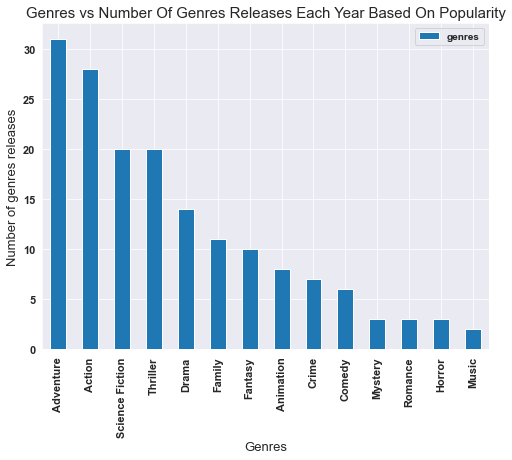

In [50]:
# Plot the bar graph.
s_df['genres'].value_counts().plot(kind='bar', fontsize = 11, figsize=(8,6))

# Set the labels and titles.
plt.title('Genres vs Number Of Genres Releases Each Year Based On Popularity', fontsize = 15)
plt.xlabel('Genres',fontsize = 13)
plt.ylabel('Number of genres releases', fontsize = 13)
plt.legend()
plt.show()
sns.set_style("darkgrid")


### Research Question 2  What kinds of properties are associated with movies that have high revenues?

Sorted dataset based on revenues.

In [51]:
# Sort DF bsed on revenue
df.sort_values("revenue", ascending=False, inplace=True)
df.head(10)


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,release_year
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,2009
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015
5231,597,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,1997
4361,24428,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,8903,2012
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,2015
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,3750,2011
5422,109445,6.112766,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3369,2013
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Shane Black,130,Action|Adventure|Science Fiction,Marvel Studios,6882,2013


Correlation graph between budget and revenue.

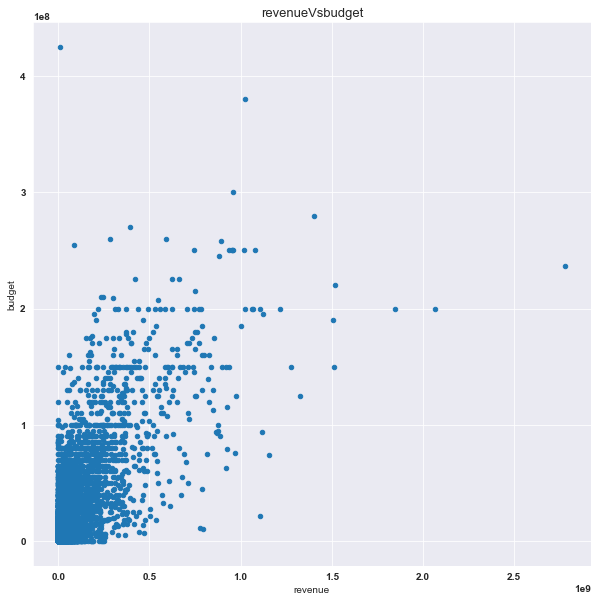

In [52]:
# Lets see budget and revenue correlation
def scatter_plt(x,y):
    # Make a scatter plot.
    df.plot(x=x, y=y,kind='scatter', figsize=(10, 10));

    # Set the title and the labels of the scatter plot.
    plt.title(x+"Vs"+y,fontsize=13)
    plt.xlabel(x)
    plt.ylabel(y)

    plt.show()
    
scatter_plt('revenue','budget')


Correlation graph between runtime and revenue.

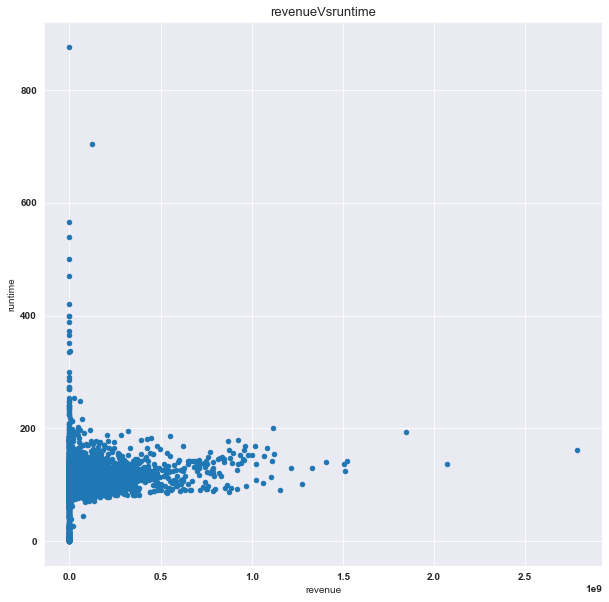

In [53]:
# Make a scatter plot.
scatter_plt('revenue','runtime')

Correlation graph between vote_count and revenue.

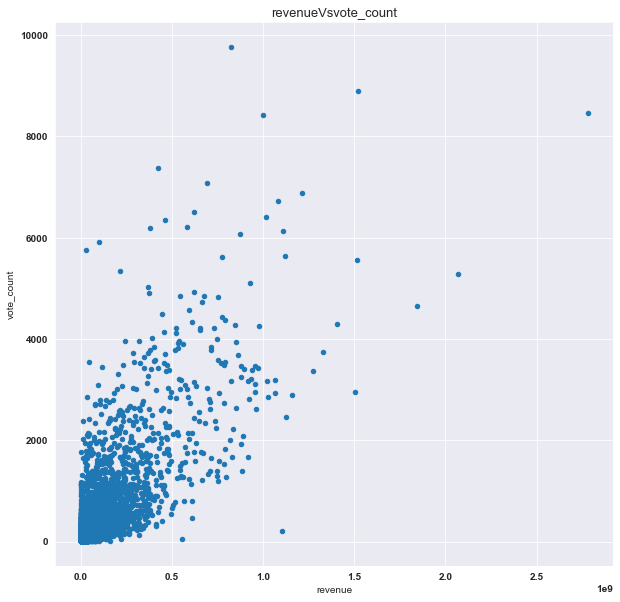

In [54]:
# revenue vs vote_count
scatter_plt('revenue','vote_count')

Correlation graph between release_year and revenue.

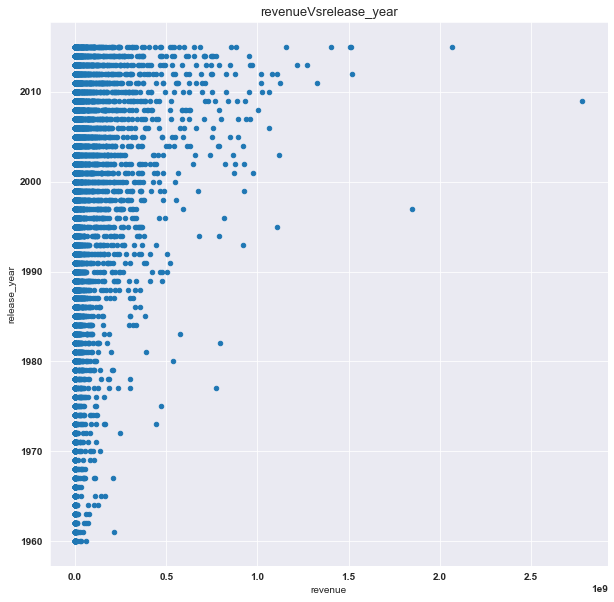

In [55]:
# revenue vs release_year
scatter_plt('revenue','release_year')

### Research Question 3  What movies couldn't cover its budget?

Quick look on movies dataset with revenue equal to zero. 

In [56]:
# Get movies with revenue equal zero
df_bad_movies = df[df['revenue'] <= 0]
df_bad_movies


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,release_year
8646,12254,0.161600,0,0,Emma,Diarmuid Lawrence,107,TV Movie|Comedy|Drama|Romance,Meridian Broadcasting Ltd,15,1996
8541,47333,0.512197,0,0,Jane Eyre,Franco Zeffirelli,112,Drama|Romance,Miramax Films,21,1996
1199,279973,0.130077,0,0,Nowhere Safe,Brian Brough,93,TV Movie|Drama,Gradual Elevate Media,11,2014
8643,27770,0.185178,3000000,0,Sometimes They Come Back... Again,Adam Grossman,98,Horror,Trimark Pictures,12,1996
8644,38223,0.176222,12000000,0,Harriet the Spy,Bronwen Hughes,100,Comedy|Drama|Family,Paramount Pictures|Rastar Pictures|Nickelodeon...,22,1996
...,...,...,...,...,...,...,...,...,...,...,...
2468,332,0.684185,75000000,0,Inspector Gadget,David Kellogg,78,Action|Adventure|Comedy|Family,Walt Disney Pictures|Caravan Pictures,171,1999
2476,4816,0.627172,0,0,Ghost Dog: The Way of the Samurai,Jim Jarmusch,116,Action|Crime|Drama,Bac Films|Pandora Filmproduktion|Degeto Film|A...,146,1999
2480,12117,0.598565,80,0,Instinct,Jon Turteltaub,126,Drama|Mystery|Thriller,Spyglass Entertainment|Touchstone Pictures,74,1999
2481,13466,0.596782,0,0,October Sky,Joe Johnston,108,Drama|Family,Universal Pictures,118,1999


In [57]:
# Number of bad Movies  
df_bad_movies['original_title'].nunique()

4991

The number of uncovered movies budget for each director.

In [58]:
# director names and the most director couldn't cover the budget
df_bad_movies['director'].value_counts()

Woody Allen                                      20
Gerald Thomas                                    11
Uwe Boll                                         11
Robert Altman                                     9
Norman Jewison                                    9
                                                 ..
Brady Corbet                                      1
Shira Piven                                       1
Wei Tung                                          1
Hiroshi Aoyama|Kazumi Fukushima|Jim Stenstrum     1
Harold P. Warren                                  1
Name: director, Length: 3355, dtype: int64

### Research Question 4  what is the hieghest release genres?

Pie chart for genres count and it shows us that drama dominante in number with 18 percent.

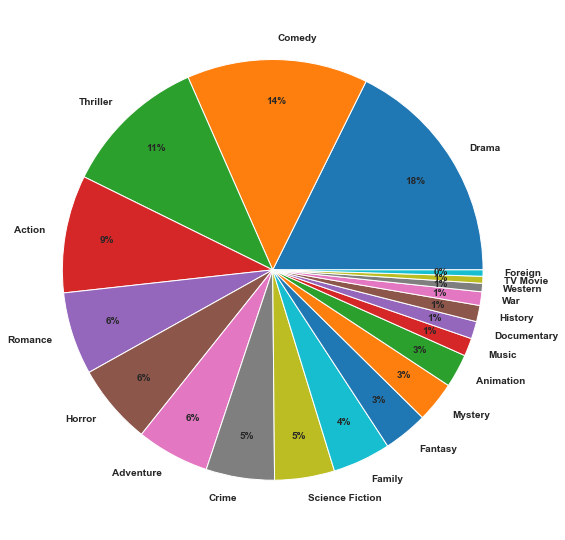

In [59]:
# pie chart for hieghest release genres
df_copy['genres'].value_counts().plot(kind='pie', figsize=(8, 8),autopct='%1.0f%%', pctdistance=0.8, label='');
plt.rc('font', weight='bold')
plt.tight_layout()

barh chart for genres count and it shows us better view.

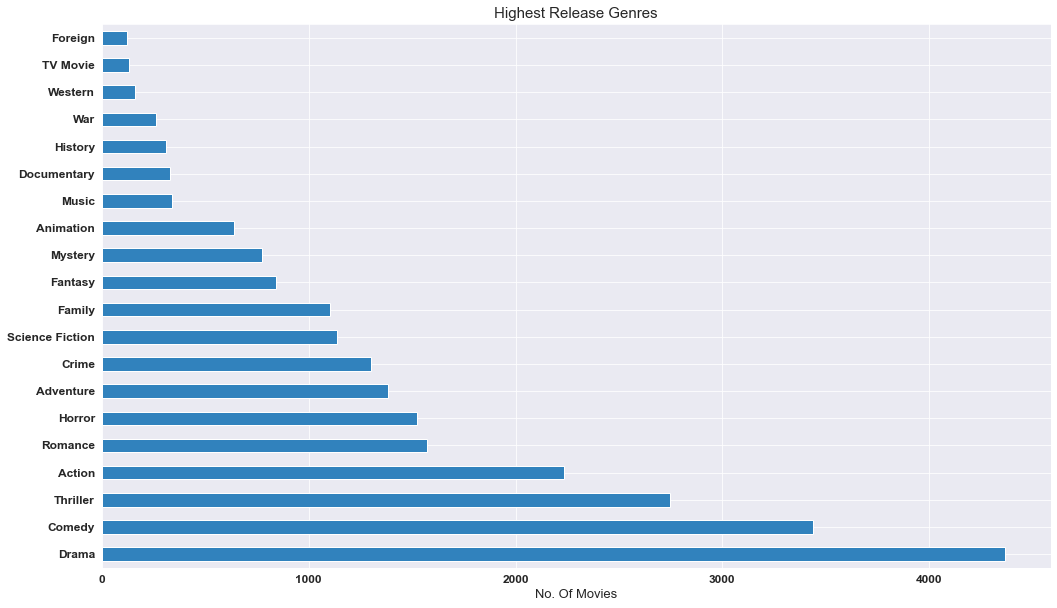

In [60]:
# Bar chart for genres count
df_copy['genres'].value_counts().plot(kind= 'barh',figsize = (17,10),fontsize=12,colormap='tab20c')

# Set the title and the labels.
plt.title("Highest Release Genres",fontsize=15)
plt.xlabel('No. Of Movies',fontsize=13)
sns.set_style("whitegrid")

<a id='conclusions'></a>
## Conclusions
> <ul><li>We found the most popular genres in each year then we got the best from them all and we ranked them based on their counts from year to year
Adventure          31
Action             28
Science Fiction    20
Thriller           20
Drama              14
Family             11
Fantasy            10
Animation           8
Crime               7
Comedy              6
Mystery             3
Romance             3
Horror              3
Music               2</li><li>budget and runtime have higher correlation with revenue than runtime</li><li>There was 4991 movie couldn't cover the budget like Emma and Jane eyre </li><li>Woody Allen director had the most number of movies that he couldn't cover
Woody Allen                                           20
Gerald Thomas                                         11
Uwe Boll                                              11  </li><li>The hieghest release genres were Drame, Comedy, Thriller, Action, Romance, Horror, Adventure, Crime etc..</li></ul>
## Limitations
> <ul><li>Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.</li><li>We couldn't find strong correlation with revenue due to the lack of data that have high revenue and also the outliers</li><li>We have limited analysis with our datset, because we worked only with a few of the given features</li></ul>
 
